## Tools for classification  

In this notebook, we will examin different machine learning tools usually used for classification. We will first discover them in the case of the Iris dataset, which we know well and will use them to predict the species from geometrical data. The geometrical data will thus be the input, and the species the output. The output type is classes, this is thus a classification problem. 

To startwith, let us make some manipulation: after determining that the column "species" is a category, it will be turned into a numerical code, which will make it easier to handle.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import pandas as pd
import seaborn as sns

In [2]:
iris = pd.read_csv('IRIS.csv',sep=';')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris['Code'] = iris['species'].astype('category').cat.codes
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   Code          150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


,sepal_length,sepal_width,petal_length,petal_width,species,Code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


And let us finish with a little rememberance of the correlations bewteen the various inputs columns.

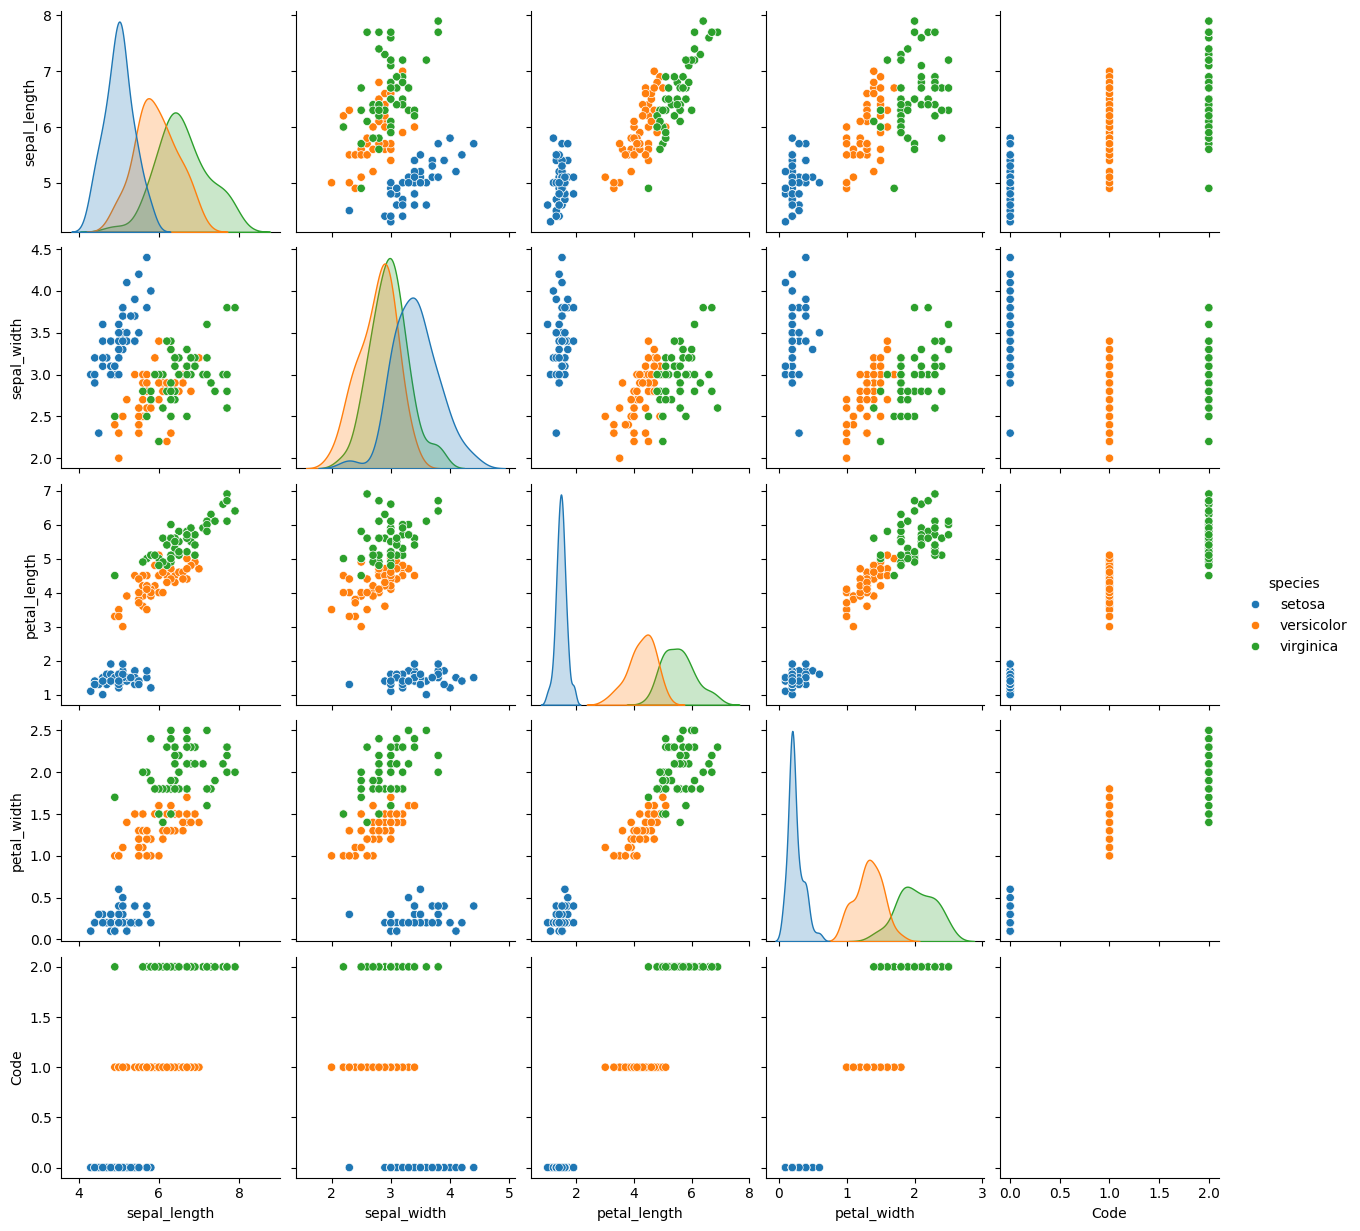

In [4]:
sns.pairplot(iris,hue='species')

## Deductive approach and confusion matrix.

This plot allows to propose an **deductive** approach to the classification by defining threshold for species according to the observations.

In [5]:
def my_deduction(row):
    if row['petal_length'] < 2.2:
        return 'setosa'
    elif row['petal_width'] > 1.6 :
        return 'virginica'
    else :
        return 'versicolor'

deduction = iris.copy()
deduction['species_ded'] = deduction.apply(my_deduction, axis=1)
display(deduction)

,sepal_length,sepal_width,petal_length,petal_width,species,Code,species_ded
0,5.1,3.5,1.4,0.2,setosa,0,setosa
1,4.9,3.0,1.4,0.2,setosa,0,setosa
2,4.7,3.2,1.3,0.2,setosa,0,setosa
3,4.6,3.1,1.5,0.2,setosa,0,setosa
4,5.0,3.6,1.4,0.2,setosa,0,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,virginica
146,6.3,2.5,5.0,1.9,virginica,2,virginica
147,6.5,3.0,5.2,2.0,virginica,2,virginica
148,6.2,3.4,5.4,2.3,virginica,2,virginica


Then the tool used to chack the validity of the predicition is the confusion matrix. It counts, for each true label, how it was predicted and reports it. We see that setosa are systematically properly predicted and that we ghve 2 versicolor that are predicted as virginica and 4 virginica predicted as versicolor.

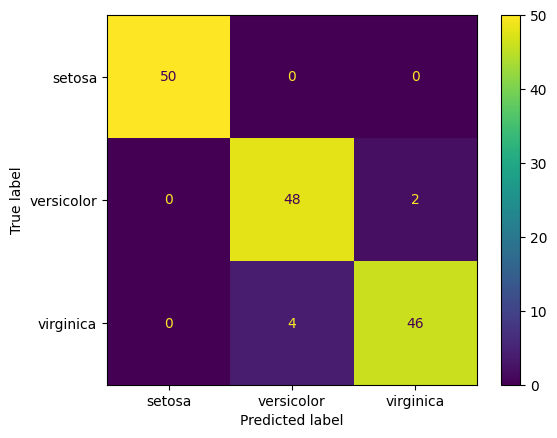

In [6]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(deduction['species'],deduction['species_ded'])
labels = deduction['species'].unique()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=labels)
cm_display.plot()

To end with, let us split the columns in input (x) and output (y). 

In [7]:
x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris[['Code']]

## Decision Trees

In [8]:
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


It is possible to train decision trees using machine learning tools. The one we are going to use is a scikitlearn tool. We will first train a decision tree using the same features as in the deduction programm used above.

In [9]:
# Parameters
X = x[['petal_length', 'petal_width']]
X

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


We then define the [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) using default values and print the parameters that are set by default. The "gini" criterion referes to "Gini Index" or "Gini impurity" which measures the probability the target class to being wrongly classified when it is randomly chosen. The degree of Gini Index varies between 0 and 1, where, '0' denotes that all elements belong to a certain class or there exists only one class (pure), and '1' denotes that the elements are randomly distributed across various classes (impure).
A Gini Index of '0.5 'denotes equally distributed elements into some classes. While building the decision tree, the feature with the least Gini Index is chosen as the root node.

In [10]:
first_tree = DecisionTreeClassifier().fit(X, y)
print(first_tree.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


We then plot the tree. We see that it is much more detailed than the one we have carried out. 

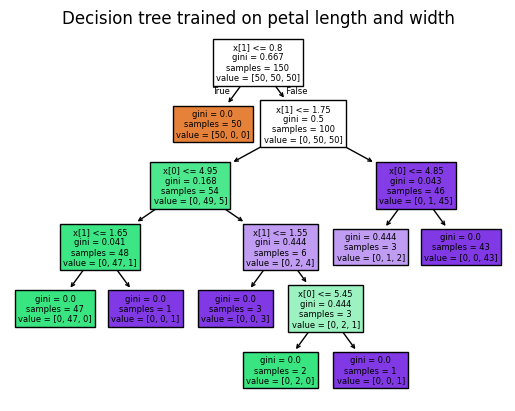

In [11]:
plot_tree(first_tree, filled=True)
plt.title("Decision tree trained on petal length and width")
plt.show()

To visualize to what corresponds such a detaied decomposition, we can vizualize the decision tree boundary. In that connection, we construct an array of possible values in the domain we want to look at and then predict type at this point. This is finally plotted. We see a very detailed contour: such a precision is characteristic of overfitting. This is the main problem with decision tree, and **Random Forests** have been designed to avoid the problem.  

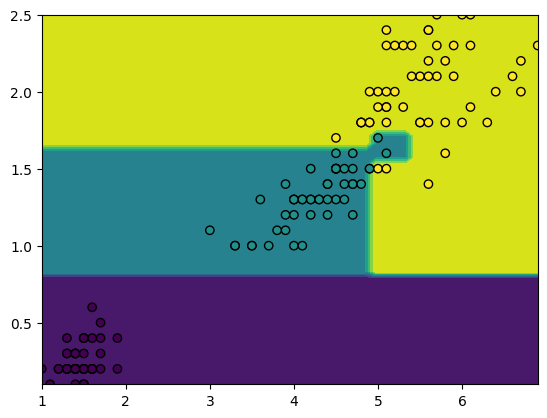

In [12]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

#Building the array

feature_1, feature_2 = np.meshgrid(
    np.linspace(X['petal_length'].min(), X['petal_length'].max()),
    np.linspace(X['petal_width'].min(), X['petal_width'].max())
)
df_mesh = pd.DataFrame({
    'petal_length': feature_1.ravel(),
    'petal_width': feature_2.ravel()
})

# Prediction of the species on all points of the array. 
mesh_pred = np.reshape(first_tree.predict(df_mesh), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=mesh_pred
)
display.plot()
display.ax_.scatter(
    iris['petal_length'], iris['petal_width'], c=iris['Code'], edgecolor="black"
)

plt.show()

Of course, with such a complex decomposition, the confusion matric is much better. 

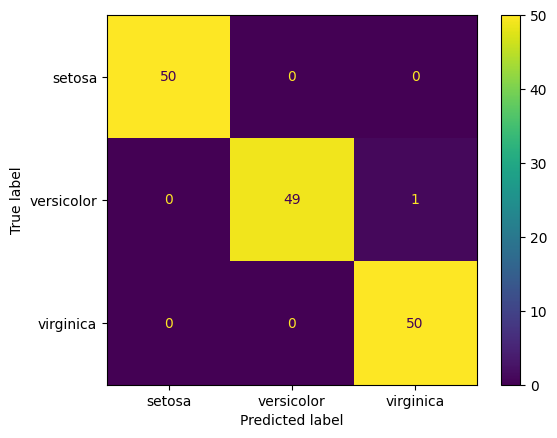

In [13]:
y_tree=first_tree.predict(X)

confusion_matrix = metrics.confusion_matrix(y,y_tree)
labels = iris['species'].unique()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=labels)
cm_display.plot()

When you have time, redo the same with sepal_width and sepal_length. See how intricate the decision tree can be. And then redo the same by splitting the dataset in training and validation set, and see how the confusion matrix of both sets are different.  
To end up with, we will do the decision tree with all the features of the iris dataset. 

In [14]:
tree_all_mod = tree.DecisionTreeClassifier()
tree_all = tree_all_mod.fit(x, y)
print(tree_all_mod.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


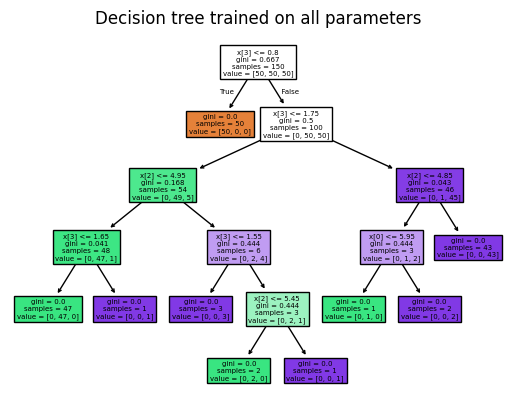

In [15]:
plot_tree(tree_all, filled=True)
plt.title("Decision tree trained on all parameters")
plt.show()

Plotting the Decision Boundary is not possible as we have a 4-dimension data set. But we can finish by plotting the confusion matrix. The results is "to good to be true" and, as already mentionned, should be validated by splitting the dataset in training and test set. 

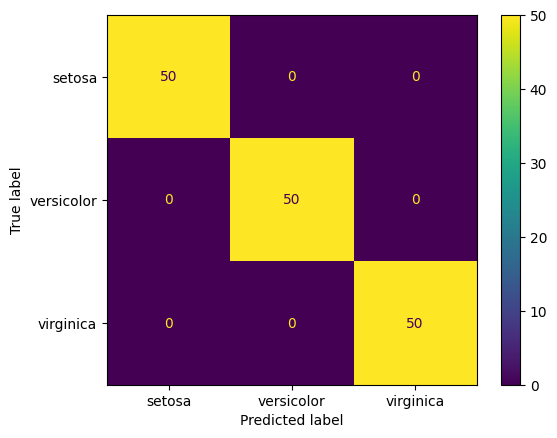

In [16]:
y_all_tree=tree_all.predict(x)

confusion_matrix = metrics.confusion_matrix(y,y_all_tree)
labels = iris['species'].unique()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=labels)
cm_display.plot()

When you have time, split the dataset and validate the approach. 

## Random forest classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

As detailed on [Scikitlearn page about Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), "A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting."

In [18]:
#clf = RandomForestClassifier(criterion = 'entropy', n_estimators=40, max_depth=2, random_state=0, bootstrap=True)
rfc_model = RandomForestClassifier(criterion = 'gini', n_estimators=40, max_depth=3, random_state=0, bootstrap=False)

In [19]:
rfc = rfc_model.fit(x,y['Code'])

In [20]:
print(rfc_model.get_params())

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


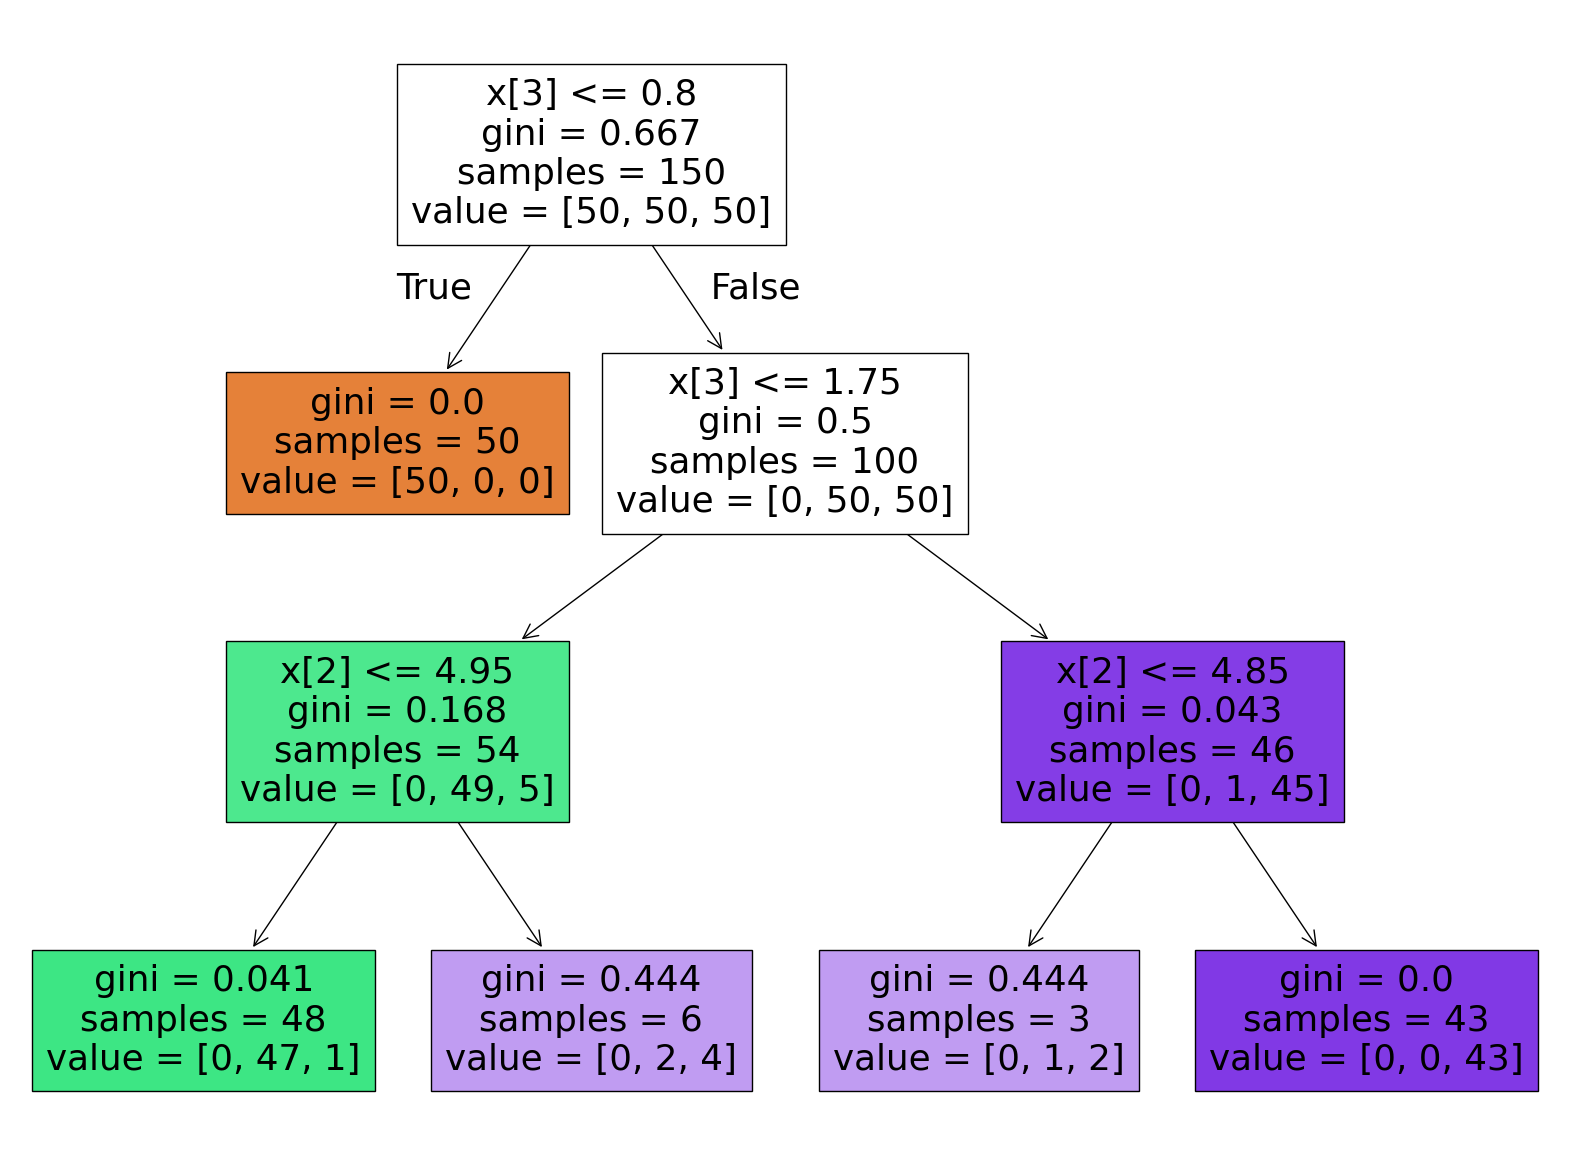

In [21]:
fig , ax = subplots(figsize=(20, 15))
tree.plot_tree(rfc.estimators_[1],filled = True);

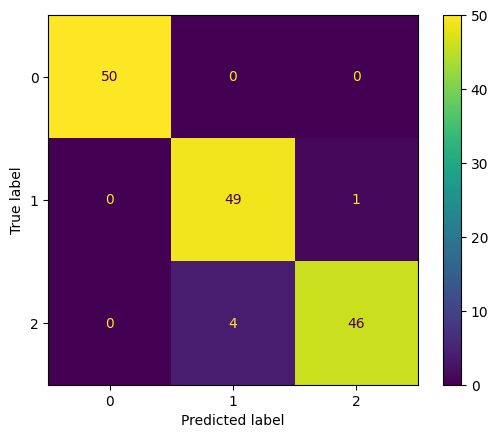

In [22]:
y_pred_rfc=rfc.predict(x)

confusion_matrix = metrics.confusion_matrix(y,y_pred_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

Now vary the 'max_depth' parameter starting from 1. What does this change? What is the minimum reasonable value? From which value is the tree fixed?

## KNN classifier

KNN stands for K-nearest neighbours and is perhaps one of the most intuitive machine learning algorithm. Once a metric is defined, the class is attributed by defining which is the clas of the neighbours and chosing the most abundant. Apolication with [scikitlearn KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is not very different in principle from what we have done until now. 

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
print(knn_model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [25]:
knn_predictor=knn_model.fit(x, y['Code'])
y_pred_knn = knn_predictor.predict(x)

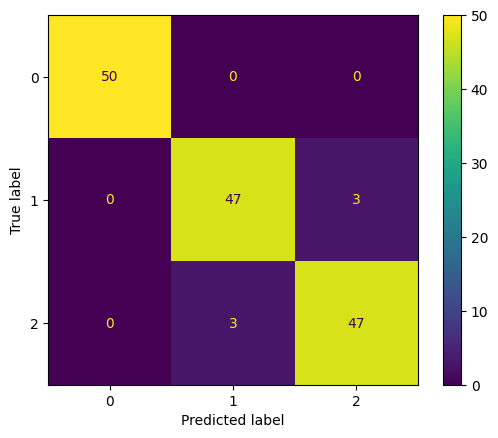

In [26]:
confusion_matrix = metrics.confusion_matrix(y,y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

Two important points in the paramter tuning are:
- the tuning of the number of neigbours
- the definition of the metric.
Let us start with tuning k. In that goal, we can define an easy quantitative way to evaluate th results and train the model with a variable number of neighbours.

<Figure size 640x480 with 0 Axes>

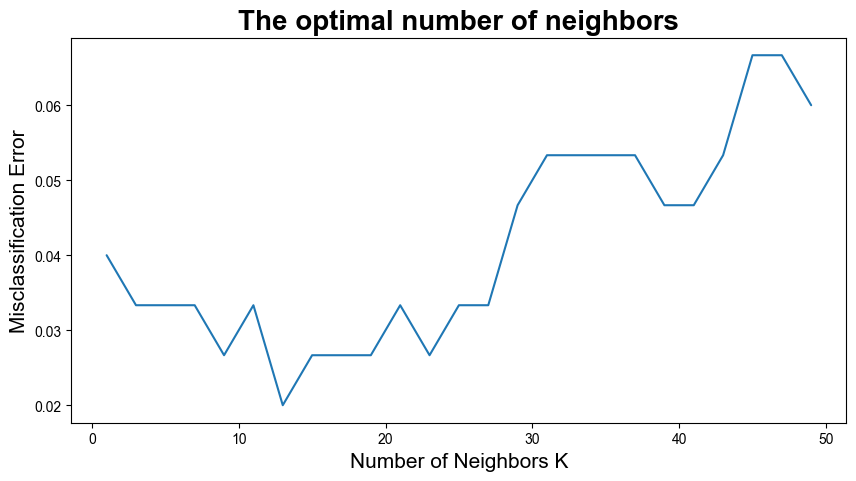

In [27]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation for each classifier
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y['Code'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - v for v in cv_scores]

# plotting the results
plt.figure()
plt.figure(figsize=(10,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()


The second problem is the metric. It is often defined as a Eucliean Distance :
<img src="disance.jpg" alt="NNZoo" width="200" style="display: block; margin: 0 auto; align:center"/>
As evidenced in the table below, length and width and sepal and petal don't have similar values at all : petal width is small and sepal length is large. As such, contribution of large distances to the distance are expected to be larger than those of small distances.

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


It is thus necessary to apply a standardization procedure as done below. We see that we obtain a distribution between 1 and -1, centered on 0 for all values. 

In [29]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x.values)
xS = scaler.transform(x.values) #returns a numpy array
#conversion into a dataframe just for display and plotting purpose
xS_df = pd.DataFrame(xS, columns=x.columns, index=x.index)
xS_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


<Figure size 640x480 with 0 Axes>

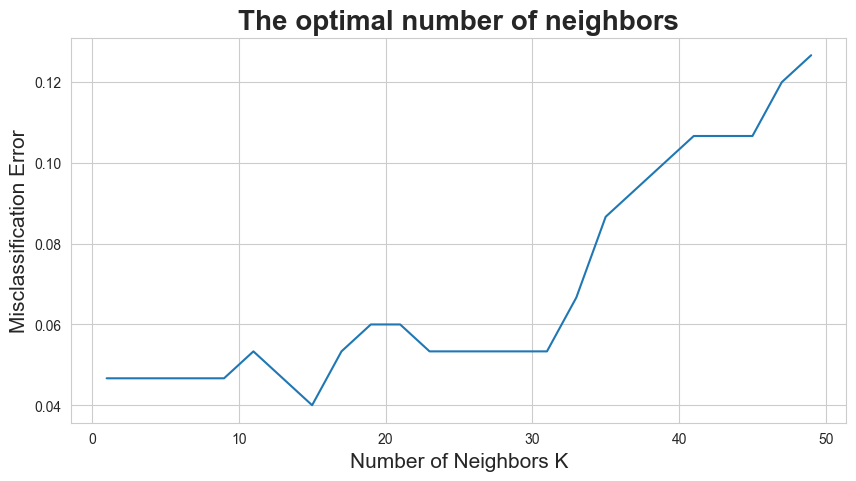

In [30]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation for each classifier
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, xS, y['Code'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# plotting the results
plt.figure()
plt.figure(figsize=(10,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()


In [31]:
knn_model = KNeighborsClassifier(n_neighbors=15)
print(knn_model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


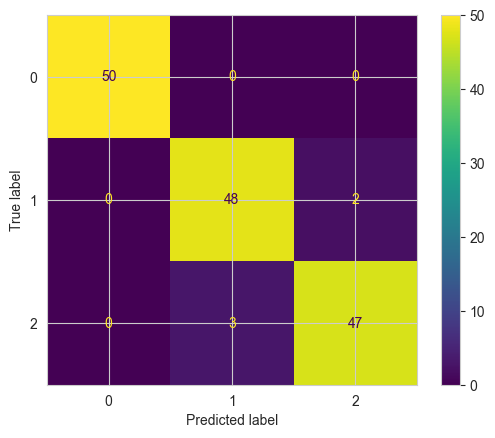

In [32]:
knn_predictor=knn_model.fit(xS, y['Code'])
y_pred_knnS = knn_predictor.predict(xS)
confusion_matrix = metrics.confusion_matrix(y,y_pred_knnS)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

## Classification with an ANN

Finally, ANN can also be used for classification. The example below, more largely described in the DS4B-Iris3 notebook, is an example of using an ANN for classification. It is presented here using [scikitlearn MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) to be consistent with the rest of the notebook. But resorting on Keras gives much more flexibility adnd robustness !

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
mlp_mod = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, 3), random_state=1)
mlp = mlp_mod.fit(xS,y['Code'])
print(mlp_mod.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (3, 3), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


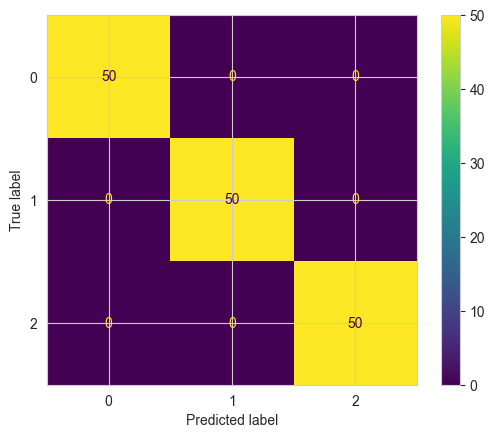

In [35]:
y_pred_mlp = mlp.predict(xS)
confusion_matrix = metrics.confusion_matrix(y,y_pred_mlp)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

## Conclusions  

Evehtough they have not systematically been used in the preceeding sheet for pedagogical purposes, the following points should systematically be done and checked in a classification project (and for many also when regression is concerned):  
- the dataset should be decomposed in training and test set, in a way keeping an equilibrium in the classes to be predicted  
- the input should be standardized in order to avoid overestimation of the effect of the variable with the biggest values  
- the catergories should be turned into numerical classes, and even better into boolean classes using onehot encoding (not discussed here !)
- the parameters of the fitting procedure should be optimized to ensure convergence and avoir overfitting
- convergence should be evaluated on the training and validation set

## Now it is time for training

Split the class in group. Each group must choose one of the classifier developped above and apply it to the origin_dev.csv dataset. Once you have trained and defined the parameters you believe are the best, use the origin_eval.csv dataset as a validation set and plot the confusion matrix... This is a "blind" test : you train the model on a dataset without knowing the one that will be used as a test. 